# 관람객 토큰화 & 워드 클라우드

In [1]:
import re
from collections import Counter

import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
from konlpy.tag import Okt
from wordcloud import WordCloud

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## 전처리 파일 불러오기

In [2]:
file = 'C:/coding/multicampus/프로젝트_주간_3조/범죄도시2_네이버영화_관람객리뷰.csv'
encoding='utf8'
rev = pd.read_csv(file, encoding=encoding)
rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27343 entries, 0 to 27342
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  27343 non-null  int64 
 1   ratings     27343 non-null  int64 
 2   reviews     25414 non-null  object
dtypes: int64(2), object(1)
memory usage: 641.0+ KB


In [3]:
rev.head()

,Unnamed: 0,ratings,reviews
0,0,10,이 영화의 속편은 100% 성공이다. 원래 한국영화들 속편은 잘 안되고 속편 나오면...
1,1,10,시리즈로 계속 나왔으면 좋겠다. 마동석한테 최적화된 작품이다.
2,2,8,니가 강해상이냐? 아뇨. 구씬데요?
3,3,10,전편을 보고 가야 장이수 얼굴만 봐도 웃음이 나오는 이유를 알 수 있습니다:)
4,4,9,와…. 손석구 연기 진짜 미쳣다…오바하는 범죄자연기가 아니라 ㄹㅇ 범죄자같음


## 전처리 함수

In [3]:
#토큰화
def token_konlpy(text, tagset):
    okt=Okt()
    words=[]
    for word in okt.pos(text):
        if (tagset == None) or (word[0] in '손 석 구 강 해 상 장 이 수') :
            words.append(word[0])
        else:
            if (len(word[0])>1) and (word[1] in tagset) :
                words.append(word[0])
    return words

#데이터 전처리
def review_preproces_ko(data, stop_words, tagset):
    data = str(data)
    if '스포일러가 포함된 감상평입니다. 감상평 보기' in data:
        data = data.replace('스포일러가 포함된 감상평입니다. 감상평 보기', '')
    line_text = re.sub(r"[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]", " ", data) # 한글 외 특수문자 제거

    words=token_konlpy(line_text, tagset)   # 토큰화
    
    if ('손' in words)or('석' in words)or('구' in words)or('강' in words)or('해' in words)or('상' in words)or('장' in words)or('이' in words)or('수' in words) :
        word_join = ' '.join(words)
        if '손 석 구도' in word_join :
            word_join = word_join.replace('손 석 구도', '손석구')
        elif '손 석 구의' in word_join :
            word_join = word_join.replace('손 석 구의', '손석구')
        elif '손 석 구도' in word_join :
            word_join = word_join.replace('손 석 구도', '손석구')
        elif '손 석 구씨' in word_join :
            word_join = word_join.replace('손 석 구씨', '손석구')
        elif '손 석 구가' in word_join :
            word_join = word_join.replace('손 석 구가', '손석구')
        elif '손 석 구만' in word_join :
            word_join = word_join.replace('손 석 구만', '손석구')
        elif '손 석 구' in word_join :
            word_join = word_join.replace('손 석 구', '손석구')
        elif '강해 상의' in word_join :
            word_join = word_join.replace('강해 상의', '강해상')
        elif '강해 상이' in word_join :
            word_join = word_join.replace('강해 상이', '강해상')
        elif '강 해상도' in word_join :
            word_join = word_join.replace('강 해상도', '강해상')
        elif '강 해상' in word_join :
            word_join = word_join.replace('강 해상', '강해상')
        elif '강 해 상'in word_join :
            word_join = word_join.replace('강 해 상', '강해상')
        elif '장 이 수도' in word_join :
            word_join = word_join.replace('장 이 수도', '장이수')
        elif '고장 이수' in word_join :
            word_join = word_join.replace('고장 이수', '장이수')
        elif '장 이수역' in word_join :
            word_join = word_join.replace('장 이수역', '장이수')
        elif '장 이 수의' in word_join :
            word_join = word_join.replace('장 이 수의', '장이수')
        elif '장 이수' in word_join :
            word_join = word_join.replace('장 이수', '장이수')
        elif '장 이 수' in word_join :
            word_join = word_join.replace('장 이 수', '장이수')
        else:
            pass
        words = word_join.split(' ')
    
    words = [w for w in words if not w in stop_words] #불용어 제거
    return words

#워드클라우드 실행
def wordcloud(data):
    cloud = WordCloud(font_path = 'NanumGothic.ttf', background_color="white",
                      width=800, height=600).generate_from_frequencies(data) 
    plt.figure(figsize=(15,10))
    plt.imshow(cloud)
    plt.axis('off')
    plt.show() 

## 실행코드

In [5]:
# 불용어처리
pop_word = ['영화', '진짜', '역시', '그냥', '최고', '보기', '정말', '보고', '포함', '이후',
            '스포일러', '편도', '영화관', '정도', '편이', '장면', '느낌', '사람', '처음', '자체',
            '이수', '내내', '계속', '간만', '때문', '하나', '조금', '완전', '무조건', '만큼', 
            '이다', '다', '같다','던데', '기고', '나온다', '있다', '많다', '그래서', '그렇게', '아직', 
            '근데', '그래도', '어떻다', '딱', '이렇다', '같이', '함께', '물론','그만큼', '스럽다',  
            '그저', '누군지', '그걸', '특히', '아무리', '되게', '한동안', '뿐이다', '결국', '라면', 
            '첨','인하다', '오랜만', '이리', '히', '이미', '오래', '의하다', '이어서', '암튼', '아직도',
            '간간히', '탱', '우', '아무튼', '아무렇다', '푹푹', '팍팍', '앙', '후딱', '흑', '왠지', 
            '맨날', '어느', '희다', '아무래도', '으', '대놓고', '너무나', '빨리', '깜짝깜짝', '저렇게', 
            '쉽다', '넘치다', '역다', '성하다', '한테', '한번', '아무', '이제','뭐', '해도', 
            '근래', '더욱', '보시', '그대로', '크게', '순간','이영화', '라서', '여서', '장', '이', 
            '다운',  '경우', '무비','세라', '가지', '덕분', '손', '석', '구', '강', '해', '상', '수']

f = open('c:/coding/multicampus/datas/한글 불용어.txt', 'r', encoding='utf8')
stop_words = f.read().splitlines()
[stop_words.append(stop) for stop in pop_word]
print(len(stop_words))

802


In [30]:
tagset = 'Noun'
result = review_preproces_ko(rev['reviews'][4], stop_words, tagset)
result

words ['손', '석', '구', '연기', '진짜', '미쳣다', '바하', '범죄자', '연기', '범죄자']
word_join 손 석 구 연기 진짜 미쳣다 바하 범죄자 연기 범죄자


['손석구', '연기', '미쳣다', '바하', '범죄자', '연기', '범죄자']

In [8]:
#없음 None, 1개 str, 2개이상 list
tagset = 'Noun'

# 전처리 column & 보이게할 단어 빈도수 설정
col = 'reviews'
view_num = 100

results =[]
for line in rev[col]: #전체 데이터 전처리
    result = review_preproces_ko(line, stop_words, tagset)
    results.append(result)

data = np.concatenate(results).tolist() #1차원 리스트로 축소

count = Counter(data)
word = dict(count.most_common(view_num)) 

print(word)

{'마동석': 4553, '연기': 3365, '손석구': 3259, '액션': 3184, '배우': 2266, '범죄': 2234, '도시': 2075, '스토리': 1237, '재미': 1099, '장첸': 980, '기대': 962, '생각': 911, '중간': 821, '코믹': 705, '웃음': 679, '마블리': 664, '시리즈': 632, '구씨': 631, '악역': 604, '격감': 591, '속편': 589, '빌런': 538, '대박': 503, '스트레스': 502, '추천': 493, '연출': 480, '캐릭터': 479, '전편': 478, '포인트': 460, '장이수': 431, '강해상': 424, '극장': 408, '연기력': 406, '요소': 398, '개인': 397, '천만': 394, '유머': 392, '매력': 391, '한국': 380, '긴장감': 378, '존잼': 372, '코로나': 371, '개그': 371, '시즌': 365, '전작': 357, '형사': 356, '몰입': 345, '관람': 345, '부분': 338, '꿀잼': 337, '킬링타임': 322, '웃기': 318, '다시': 318, '평점': 295, '강추': 284, '주먹': 280, '오락': 279, '아주': 276, '한국영': 265, '소리': 260}


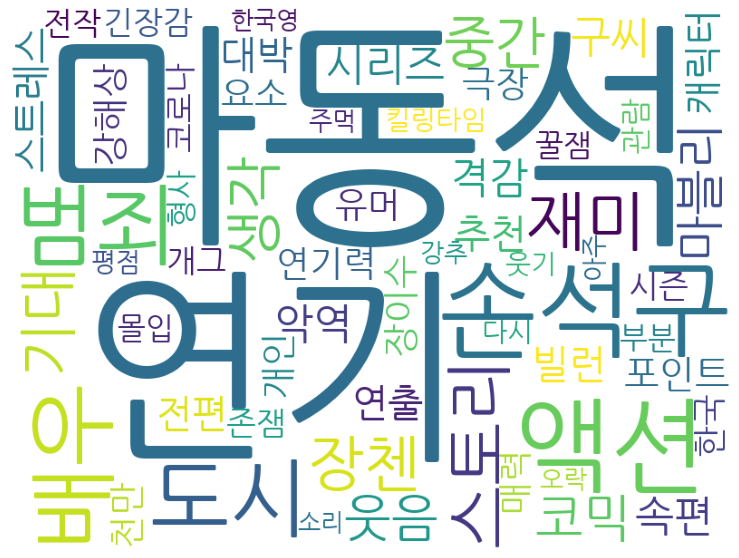

In [10]:
wordcloud(word)

# 전문가 텍스트전처리&워드클라우드

In [11]:
file = 'C:/coding/multicampus/프로젝트_주간_3조/범죄도시2_네이버영화_전문가리뷰.csv'
encoding='utf8'
rev = pd.read_csv(file, encoding=encoding)
rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  9 non-null      int64 
 1   point       9 non-null      int64 
 2   review      9 non-null      object
dtypes: int64(2), object(1)
memory usage: 344.0+ bytes


In [12]:
#없음 None, 1개 str, 2개이상 list
tagset = 'Noun'

# 전처리 column & 보이게할 단어 빈도수 설정
col = 'review'
view_num = 30

results =[]
for line in rev[col]: #전체 데이터 전처리
    result = review_preproces_ko(line, stop_words, tagset)
    results.append(result)

data = np.concatenate(results).tolist() #1차원 리스트로 축소

count = Counter(data)
word = dict(count.most_common(view_num)) 

print(word)

{'마동석': 9, '형사': 6, '액션': 5, '캐릭터': 5, '시리즈': 4, '범죄': 4, '도시': 4, '정의': 3, '그것': 3, '군더더기': 2, '히어로': 2, '절절': 2, '집중': 2, '구현': 2, '매력': 2, '손석구': 2, '활약': 2, '존재': 2, '관객': 2, '슈퍼히어로': 2, '장첸': 2, '주인공': 2, '악당': 2, '전편': 2, '주먹': 2, '시네마': 2, '유니버스': 2, '물이': 1, '악인': 1, '사연': 1}


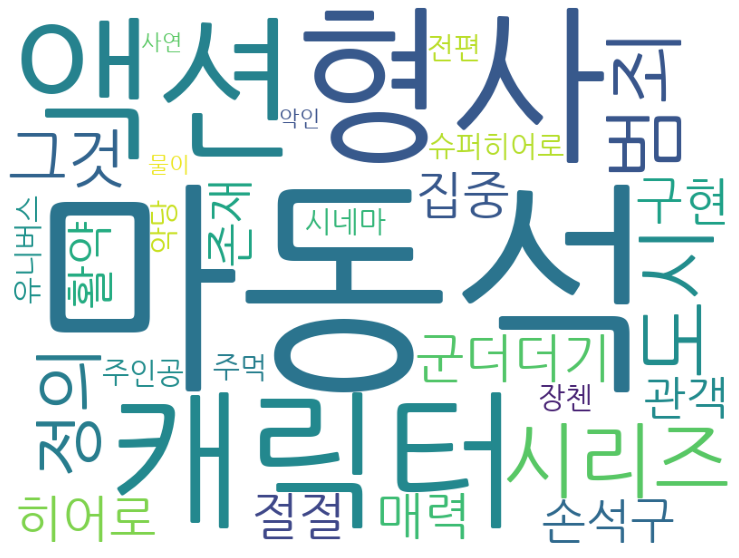

In [13]:
wordcloud(word)